This sprint tests whether Dortmund home matches are underpriced on team corner overs against low-block opponents, because the market relies on generic possession proxies and underweights tactical asymmetry. I will falsify this by comparing my modeled probabilities to exchange-implied probabilities and tracking whether the market consistently moves against my estimates.

In [3]:
import pandas as pd
from pathlib import Path

# Build an environment-agnostic path to the data file (relative to the project root)
project_root = Path().resolve()
data_path = project_root / "Data" / "2025:2026.csv"

df = pd.read_csv(data_path)

# Filter for Borussia Dortmund as either HomeTeam or AwayTeam
dortmund_df = df[(df['HomeTeam'] == 'Dortmund') | (df['AwayTeam'] == 'Dortmund')]

# Select and display the specified columns
display(dortmund_df[['Date', 'HomeTeam', 'AwayTeam', 'HC', 'AC']].head())

,Date,HomeTeam,AwayTeam,HC,AC
6,23/08/2025,St Pauli,Dortmund,5,2
16,31/08/2025,Dortmund,Union Berlin,4,6
20,13/09/2025,Heidenheim,Dortmund,5,4
35,21/09/2025,Dortmund,Wolfsburg,9,3
38,27/09/2025,Mainz,Dortmund,7,5


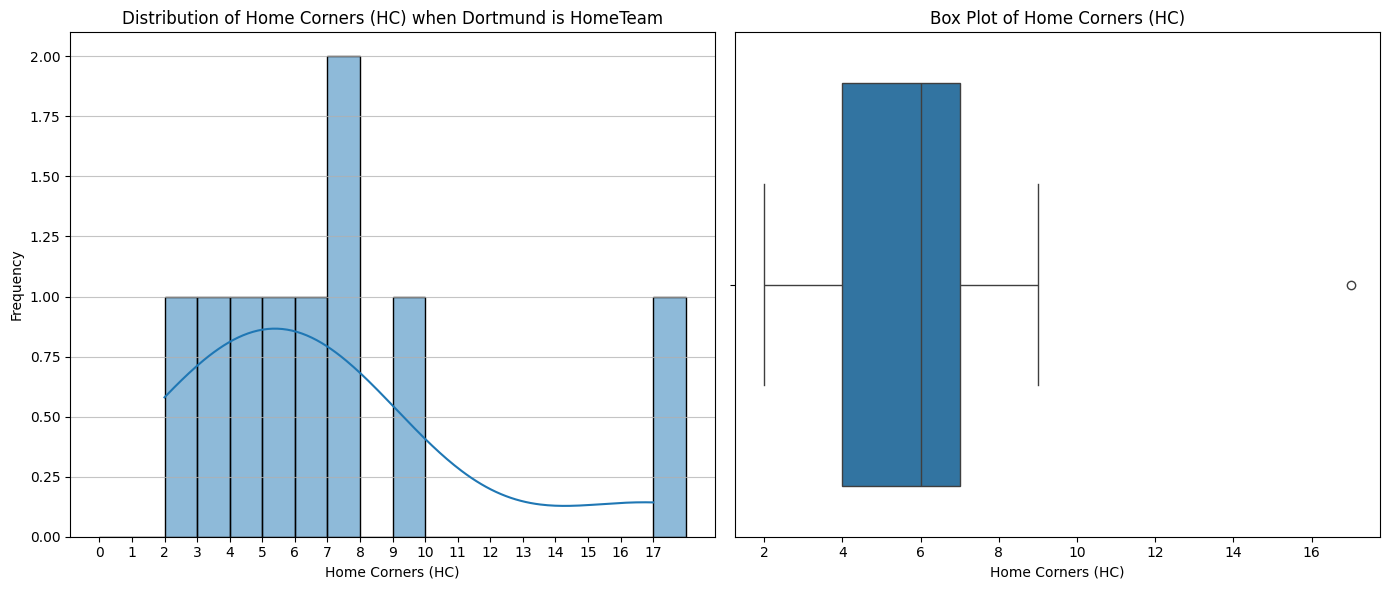

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Dortmund as HomeTeam
dortmund_home_df = dortmund_df[dortmund_df['HomeTeam'] == 'Dortmund']

# Plot the distribution of HC (histogram) and a box plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(dortmund_home_df['HC'].dropna(), kde=True,
             bins=range(0, int(dortmund_home_df['HC'].max()) + 2),
             ax=axes[0])
axes[0].set_title('Distribution of Home Corners (HC) when Dortmund is HomeTeam')
axes[0].set_xlabel('Home Corners (HC)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(0, int(dortmund_home_df['HC'].max()) + 1))
axes[0].grid(axis='y', alpha=0.75)

# Box plot
sns.boxplot(x=dortmund_home_df['HC'].dropna(), ax=axes[1])
axes[1].set_title('Box Plot of Home Corners (HC)')
axes[1].set_xlabel('Home Corners (HC)')

plt.tight_layout()
plt.show()

# Task
Import the datasets "2023:2024.csv" and "2024:2025.csv", adding a "Season" column to each with its respective value. Then, merge the two datasets and display the 'Date', 'HomeTeam', 'AwayTeam', 'HC', 'AC', and 'Season' columns.

## Import 2023:2024 dataset and add Season column

### Subtask:
Read the '2023:2024.csv' file into a pandas DataFrame and add a 'Season' column with the value '2023:2024'.


**Reasoning**:
I will load the '2023:2024.csv' file into a pandas DataFrame and then add a new 'Season' column with the value '2023:2024' to it.



In [14]:
from pathlib import Path

data_path_2023_2024 = project_root / "Data" / "2023:2024.csv"

df_2023_2024 = pd.read_csv(data_path_2023_2024)
df_2023_2024['Season'] = '2023:2024'
print("DataFrame 'df_2023_2024' loaded and 'Season' column added. Displaying head:")
display(df_2023_2024.head())

DataFrame 'df_2023_2024' loaded and 'Season' column added. Displaying head:


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0,1,...,1.75,1.85,2.08,1.88,2.03,1.92,2.09,1.85,2.00,2023:2024
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3,3,...,0.25,1.82,2.11,1.83,2.11,1.83,2.18,1.77,2.09,2023:2024
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0,2,...,-0.25,1.91,2.02,1.92,2.01,1.98,2.02,1.91,1.95,2023:2024
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2,1,...,-0.25,2.11,1.82,2.14,1.84,2.14,1.84,2.09,1.78,2023:2024
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2,0,...,-0.75,1.98,1.95,1.99,1.93,2.06,1.96,1.95,1.89,2023:2024


## Import 2024:2025 dataset and add Season column

### Subtask:
Read the '2024:2025.csv' file into a pandas DataFrame and add a 'Season' column with the value '2024:2025'.


**Reasoning**:
I will read the '2024:2025.csv' file into a new DataFrame named 'df_2024_2025', then add a 'Season' column with the value '2024:2025', and finally display the head of the DataFrame to verify the changes.



In [15]:
data_path_2024_2025 = project_root / "Data" / "2024:2025.csv"

df_2024_2025 = pd.read_csv(data_path_2024_2025)
df_2024_2025['Season'] = '2024:2025'
print("DataFrame 'df_2024_2025' loaded and 'Season' column added. Displaying head:")
display(df_2024_2025.head())

DataFrame 'df_2024_2025' loaded and 'Season' column added. Displaying head:


/var/folders/3l/3r33nlzx08x33ms97984bk_m0000gn/T/ipykernel_59455/1606580608.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2024_2025['Season'] = '2024:2025'


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA,Season
0,D1,23/08/2024,19:30,M'gladbach,Leverkusen,2,3,A,0.0,2.0,...,2.04,1.87,2.06,1.96,2.08,1.91,1.96,1.91,2.07,2024:2025
1,D1,24/08/2024,14:30,Augsburg,Werder Bremen,2,2,D,2.0,1.0,...,2.05,1.88,2.04,1.88,2.06,1.86,2.03,1.90,2.10,2024:2025
2,D1,24/08/2024,14:30,Freiburg,Stuttgart,3,1,H,1.0,1.0,...,1.98,1.95,1.97,1.98,2.09,1.87,2.00,1.95,2.04,2024:2025
3,D1,24/08/2024,14:30,Hoffenheim,Holstein Kiel,3,2,H,2.0,0.0,...,1.90,1.99,1.93,2.16,1.95,2.02,1.86,2.00,1.95,2024:2025
4,D1,24/08/2024,14:30,Mainz,Union Berlin,1,1,D,0.0,0.0,...,1.83,2.11,1.83,2.13,1.85,2.07,1.81,2.18,1.84,2024:2025


## Merge the two datasets

### Subtask:
Concatenate the two DataFrames (2023:2024 and 2024:2025) into a single DataFrame.


**Reasoning**:
To merge the two DataFrames, I will use `pd.concat` to combine `df_2023_2024` and `df_2024_2025` vertically, reset the index, and then display the head of the resulting `merged_df` to confirm the operation.



In [16]:
# Find columns present in one dataframe but not the other
cols_2023 = set(df_2023_2024.columns)
cols_2024 = set(df_2024_2025.columns)

missing_in_2024 = cols_2023 - cols_2024
missing_in_2023 = cols_2024 - cols_2023

print(f"Number of columns in df_2023_2024: {len(cols_2023)}")
print(f"Number of columns in df_2024_2025: {len(cols_2024)}")
print(f"Columns present in df_2023_2024 but missing in df_2024_2025 ({len(missing_in_2024)}):")
print(missing_in_2024)
print(f"Columns present in df_2024_2025 but missing in df_2023_2024 ({len(missing_in_2023)}):")
print(missing_in_2023)

# Store missing columns in a DataFrame for reference and later dropping
missing_columns_data = {
    'Column': list(missing_in_2024) + list(missing_in_2023),
    'Missing_In': ['df_2024_2025'] * len(missing_in_2024) + ['df_2023_2024'] * len(missing_in_2023),
    'Source_DataFrame': ['df_2023_2024'] * len(missing_in_2024) + ['df_2024_2025'] * len(missing_in_2023)
}
missing_columns_df = pd.DataFrame(missing_columns_data)
missing_columns_df = missing_columns_df.sort_values(['Missing_In', 'Column']).reset_index(drop=True)

print("\n" + "=" * 80)
print("Missing Columns DataFrame:")
print("=" * 80)
display(missing_columns_df)

# Get all columns that are missing in either dataset (these will be dropped after merge)
all_missing_columns = list(missing_in_2024 | missing_in_2023)
print(f"\nTotal unique columns to drop after merge: {len(all_missing_columns)}")
print(f"Columns to drop: {sorted(all_missing_columns)}")



Number of columns in df_2023_2024: 106
Number of columns in df_2024_2025: 120
Columns present in df_2023_2024 but missing in df_2024_2025 (12):
{'VCD', 'VCCD', 'VCH', 'IWCA', 'IWD', 'IWH', 'VCA', 'VCCA', 'IWCD', 'VCCH', 'IWCH', 'IWA'}
Columns present in df_2024_2025 but missing in df_2023_2024 (26):
{'BFEA', 'BFECA', 'BFEC>2.5', 'BFE<2.5', 'BFECH', 'BFH', 'BFEH', 'BFCD', '1XBCA', '1XBD', 'BFD', '1XBH', '1XBCD', 'BFECAHA', 'BFCH', 'BFA', 'BFECAHH', 'BFEAHH', 'BFCA', 'BFED', '1XBA', 'BFECD', 'BFE>2.5', 'BFEC<2.5', 'BFEAHA', '1XBCH'}

Missing Columns DataFrame:


,Column,Missing_In,Source_DataFrame
0,1XBA,df_2023_2024,df_2024_2025
1,1XBCA,df_2023_2024,df_2024_2025
2,1XBCD,df_2023_2024,df_2024_2025
3,1XBCH,df_2023_2024,df_2024_2025
4,1XBD,df_2023_2024,df_2024_2025
5,1XBH,df_2023_2024,df_2024_2025
6,BFA,df_2023_2024,df_2024_2025
7,BFCA,df_2023_2024,df_2024_2025
8,BFCD,df_2023_2024,df_2024_2025
9,BFCH,df_2023_2024,df_2024_2025



Total unique columns to drop after merge: 38
Columns to drop: ['1XBA', '1XBCA', '1XBCD', '1XBCH', '1XBD', '1XBH', 'BFA', 'BFCA', 'BFCD', 'BFCH', 'BFD', 'BFE<2.5', 'BFE>2.5', 'BFEA', 'BFEAHA', 'BFEAHH', 'BFEC<2.5', 'BFEC>2.5', 'BFECA', 'BFECAHA', 'BFECAHH', 'BFECD', 'BFECH', 'BFED', 'BFEH', 'BFH', 'IWA', 'IWCA', 'IWCD', 'IWCH', 'IWD', 'IWH', 'VCA', 'VCCA', 'VCCD', 'VCCH', 'VCD', 'VCH']


In [17]:
# Map missing column acronyms to readable names based on football-data.co.uk notes
# Reference: Data/football-data.co.uk_notes.txt.pdf

print("=" * 80)
print("MISSING COLUMNS MAPPING - Readable Names")
print("=" * 80)

print("\n📊 Columns in df_2023_2024 but MISSING in df_2024_2025 (12 columns):")
print("-" * 80)

missing_2024_readable = {
    'VCH': 'VC Bet home win odds (now BetVictor)',
    'VCD': 'VC Bet draw odds (now BetVictor)',
    'VCA': 'VC Bet away win odds (now BetVictor)',
    'VCCH': 'VC Bet closing home win odds (now BetVictor)',
    'VCCD': 'VC Bet closing draw odds (now BetVictor)',
    'VCCA': 'VC Bet closing away win odds (now BetVictor)',
    'IWH': 'Interwetten home win odds',
    'IWD': 'Interwetten draw odds',
    'IWA': 'Interwetten away win odds',
    'IWCH': 'Interwetten closing home win odds',
    'IWCD': 'Interwetten closing draw odds',
    'IWCA': 'Interwetten closing away win odds'
}

for col in sorted(missing_in_2024):
    readable = missing_2024_readable.get(col, 'Unknown')
    print(f"  • {col:12} → {readable}")

print("\n📊 Columns in df_2024_2025 but MISSING in df_2023_2024 (26 columns):")
print("-" * 80)

missing_2023_readable = {
    # 1XBet odds
    '1XBH': '1XBet home win odds',
    '1XBD': '1XBet draw odds',
    '1XBA': '1XBet away win odds',
    '1XBCH': '1XBet closing home win odds',
    '1XBCD': '1XBet closing draw odds',
    '1XBCA': '1XBet closing away win odds',
    
    # Betfair regular odds
    'BFH': 'Betfair home win odds',
    'BFD': 'Betfair draw odds',
    'BFA': 'Betfair away win odds',
    'BFCH': 'Betfair closing home win odds',
    'BFCD': 'Betfair closing draw odds',
    'BFCA': 'Betfair closing away win odds',
    
    # Betfair Exchange odds
    'BFEH': 'Betfair Exchange home win odds',
    'BFED': 'Betfair Exchange draw odds',
    'BFEA': 'Betfair Exchange away win odds',
    
    # Betfair Exchange total goals
    'BFE>2.5': 'Betfair Exchange over 2.5 goals',
    'BFE<2.5': 'Betfair Exchange under 2.5 goals',
    'BFEC>2.5': 'Betfair Exchange closing over 2.5 goals',
    'BFEC<2.5': 'Betfair Exchange closing under 2.5 goals',
    
    # Betfair Exchange Asian handicap
    'BFEAHH': 'Betfair Exchange Asian handicap home team odds',
    'BFEAHA': 'Betfair Exchange Asian handicap away team odds',
    'BFECAHH': 'Betfair Exchange closing Asian handicap home team odds',
    'BFECAHA': 'Betfair Exchange closing Asian handicap away team odds'
}

for col in sorted(missing_in_2023):
    readable = missing_2023_readable.get(col, 'Unknown')
    print(f"  • {col:12} → {readable}")

print("\n" + "=" * 80)
print("SUMMARY:")
print("=" * 80)
print(f"• df_2023_2024 missing columns: Mostly VC Bet (now BetVictor) and Interwetten odds")
print(f"• df_2024_2025 missing columns: Mostly 1XBet and Betfair Exchange odds")
print(f"• These differences reflect changes in bookmaker data availability between seasons")
print("=" * 80)


MISSING COLUMNS MAPPING - Readable Names

📊 Columns in df_2023_2024 but MISSING in df_2024_2025 (12 columns):
--------------------------------------------------------------------------------
  • IWA          → Interwetten away win odds
  • IWCA         → Interwetten closing away win odds
  • IWCD         → Interwetten closing draw odds
  • IWCH         → Interwetten closing home win odds
  • IWD          → Interwetten draw odds
  • IWH          → Interwetten home win odds
  • VCA          → VC Bet away win odds (now BetVictor)
  • VCCA         → VC Bet closing away win odds (now BetVictor)
  • VCCD         → VC Bet closing draw odds (now BetVictor)
  • VCCH         → VC Bet closing home win odds (now BetVictor)
  • VCD          → VC Bet draw odds (now BetVictor)
  • VCH          → VC Bet home win odds (now BetVictor)

📊 Columns in df_2024_2025 but MISSING in df_2023_2024 (26 columns):
--------------------------------------------------------------------------------
  • 1XBA         → 1X

In [18]:
# Merge the two dataframes
merged_df = pd.concat([df_2023_2024, df_2024_2025], ignore_index=True)

# Drop all columns that are missing in either dataset (stored in all_missing_columns)
print(f"Before dropping missing columns: {merged_df.shape[1]} columns")
merged_df = merged_df.drop(columns=all_missing_columns, errors='ignore')
print(f"After dropping missing columns: {merged_df.shape[1]} columns")
print(f"Dropped {len(all_missing_columns)} columns that were missing in one of the datasets")

print("\nDataFrames 'df_2023_2024' and 'df_2024_2025' merged into 'merged_df' (with missing columns dropped). Displaying head:")
display(merged_df.head())

Before dropping missing columns: 132 columns
After dropping missing columns: 94 columns
Dropped 38 columns that were missing in one of the datasets

DataFrames 'df_2023_2024' and 'df_2024_2025' merged into 'merged_df' (with missing columns dropped). Displaying head:


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0.0,1.0,...,1.75,1.85,2.08,1.88,2.03,1.92,2.09,1.85,2.00,2023:2024
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3.0,3.0,...,0.25,1.82,2.11,1.83,2.11,1.83,2.18,1.77,2.09,2023:2024
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0.0,2.0,...,-0.25,1.91,2.02,1.92,2.01,1.98,2.02,1.91,1.95,2023:2024
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2.0,1.0,...,-0.25,2.11,1.82,2.14,1.84,2.14,1.84,2.09,1.78,2023:2024
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2.0,0.0,...,-0.75,1.98,1.95,1.99,1.93,2.06,1.96,1.95,1.89,2023:2024


**Reasoning**:
The previous step successfully merged the two dataframes. Now, I need to display only the specified columns ('Date', 'HomeTeam', 'AwayTeam', 'HC', 'AC', 'Season') from the `merged_df` to complete the task.



In [20]:
selected_df = merged_df[['Date', 'HomeTeam', 'AwayTeam', 'HC', 'AC', 'Season']]
print("Displaying selected columns from merged_df:")
display(selected_df.head())

Displaying selected columns from merged_df:


,Date,HomeTeam,AwayTeam,HC,AC,Season
0,18/08/2023,Werder Bremen,Bayern Munich,0.0,6.0,2023:2024
1,19/08/2023,Augsburg,M'gladbach,8.0,7.0,2023:2024
2,19/08/2023,Hoffenheim,Freiburg,4.0,2.0,2023:2024
3,19/08/2023,Leverkusen,RB Leipzig,4.0,5.0,2023:2024
4,19/08/2023,Stuttgart,Bochum,7.0,0.0,2023:2024


Inspection

In [21]:

# Calculate mean HC for HomeTeam "Dortmund" and mean AC for AwayTeam "Dortmund", for each Season
results = []

for season in selected_df['Season'].unique():
    season_df = selected_df[selected_df['Season'] == season]

    # Mean HC when Dortmund is HomeTeam
    dortmund_home = season_df[season_df['HomeTeam'] == 'Dortmund']
    mean_hc = dortmund_home['HC'].mean()

    # Mean AC when Dortmund is AwayTeam
    dortmund_away = season_df[season_df['AwayTeam'] == 'Dortmund']
    mean_ac = dortmund_away['AC'].mean()

    results.append({
        'Season': season,
        'Mean HC (Dortmund Home)': mean_hc,
        'Mean AC (Dortmund Away)': mean_ac
    })

results_df = pd.DataFrame(results)
print("Mean HC (Dortmund as Home) and Mean AC (Dortmund as Away) per Season:")
display(results_df)




Mean HC (Dortmund as Home) and Mean AC (Dortmund as Away) per Season:


,Season,Mean HC (Dortmund Home),Mean AC (Dortmund Away)
0,2023:2024,6.000000,4.352941
1,2024:2025,6.411765,4.823529


Mean, Variance, and Standard Deviation for HC (Dortmund as Home) and AC (Dortmund as Away) per Season:


,Season,Mean HC (Dortmund Home),Mean AC (Dortmund Away),Variance HC (Dortmund Home),Variance AC (Dortmund Away),Std Dev HC (Dortmund Home),Std Dev AC (Dortmund Away)
0,2023:2024,6.000000,4.352941,5.375000,4.742647,2.318405,2.177762
1,2024:2025,6.411765,4.823529,6.882353,9.529412,2.623424,3.086975


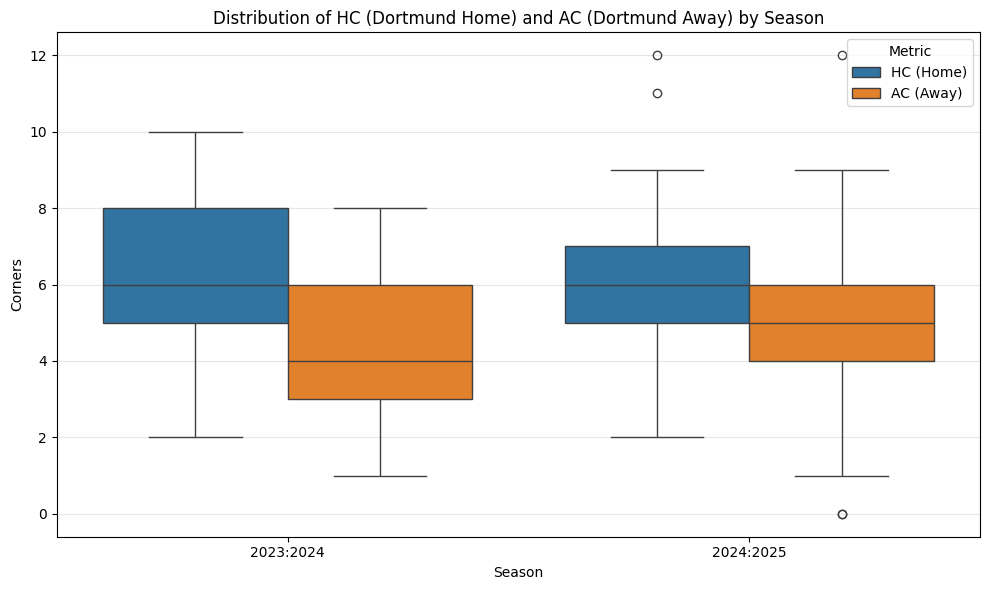

In [23]:
# Calculate variance for HC (Dortmund Home) and AC (Dortmund Away) per season
results = []

for season in merged_df['Season'].unique():
    season_data = merged_df[merged_df['Season'] == season]
    
    # Filter for Dortmund home matches
    dortmund_home = season_data[season_data['HomeTeam'] == 'Dortmund']
    
    # Filter for Dortmund away matches
    dortmund_away = season_data[season_data['AwayTeam'] == 'Dortmund']
    
    # Calculate means
    mean_hc = dortmund_home['HC'].mean()
    mean_ac = dortmund_away['AC'].mean()
    
    # Calculate variances
    var_hc = dortmund_home['HC'].var()
    var_ac = dortmund_away['AC'].var()
    
    # Calculate standard deviations (for reference)
    std_hc = dortmund_home['HC'].std()
    std_ac = dortmund_away['AC'].std()
    
    results.append({
        'Season': season,
        'Mean HC (Dortmund Home)': mean_hc,
        'Mean AC (Dortmund Away)': mean_ac,
        'Variance HC (Dortmund Home)': var_hc,
        'Variance AC (Dortmund Away)': var_ac,
        'Std Dev HC (Dortmund Home)': std_hc,
        'Std Dev AC (Dortmund Away)': std_ac
    })

results_df = pd.DataFrame(results)
print("Mean, Variance, and Standard Deviation for HC (Dortmund as Home) and AC (Dortmund as Away) per Season:")
display(results_df)

# Create a long-form DataFrame for box plotting HC and AC distributions per season
import seaborn as sns
import matplotlib.pyplot as plt

boxplot_data = []
for season in merged_df['Season'].unique():
    season_data = merged_df[merged_df['Season'] == season]

    # Dortmund home HC values
    dortmund_home = season_data[season_data['HomeTeam'] == 'Dortmund']
    for v in dortmund_home['HC'].dropna():
        boxplot_data.append({
            'Season': season,
            'Metric': 'HC (Home)',
            'Value': v
        })

    # Dortmund away AC values
    dortmund_away = season_data[season_data['AwayTeam'] == 'Dortmund']
    for v in dortmund_away['AC'].dropna():
        boxplot_data.append({
            'Season': season,
            'Metric': 'AC (Away)',
            'Value': v
        })

boxplot_df = pd.DataFrame(boxplot_data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_df, x='Season', y='Value', hue='Metric')
plt.title('Distribution of HC (Dortmund Home) and AC (Dortmund Away) by Season')
plt.xlabel('Season')
plt.ylabel('Corners')
plt.legend(title='Metric')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# Dispersion statistics (by season) for HC (Dortmund Home) and AC (Dortmund Away)
# - IQR: robust spread (Q3 - Q1)
# - CV: coefficient of variation (Std / Mean)
# - Dispersion Ratio: Pearson Chi-square / residual df (Poisson-style), i.e.
#   sum((y - mu)^2 / mu) / (n - 1)

import numpy as np
import pandas as pd


def dispersion_stats(series: pd.Series) -> dict:
    s = pd.to_numeric(series, errors='coerce').dropna()

    if s.empty:
        return {
            'N': 0,
            'Mean': np.nan,
            'Std': np.nan,
            'Variance': np.nan,
            'IQR': np.nan,
            'CV (Std/Mean)': np.nan,
            'Pearson Chi-square': np.nan,
            'Residual df': np.nan,
            'Dispersion Ratio': np.nan,
        }

    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    mean = float(s.mean())
    std = float(s.std())
    var = float(s.var())
    n = int(s.shape[0])
    df_resid = n - 1  # one parameter (mu) estimated

    # Pearson Chi-square for Poisson-style dispersion (using constant mu=mean)
    if mean > 0:
        pearson_chi2 = float((((s - mean) ** 2) / mean).sum())
        dispersion_ratio = float(pearson_chi2 / df_resid) if df_resid > 0 else np.nan
    else:
        pearson_chi2 = np.nan
        dispersion_ratio = np.nan

    return {
        'N': n,
        'Mean': mean,
        'Std': std,
        'Variance': var,
        'IQR': float(q3 - q1),
        'CV (Std/Mean)': float(std / mean) if mean != 0 else np.nan,
        'Pearson Chi-square': pearson_chi2,
        'Residual df': df_resid if df_resid > 0 else np.nan,
        'Dispersion Ratio': dispersion_ratio,
    }


disp_rows = []
for season in sorted(merged_df['Season'].dropna().unique()):
    season_data = merged_df[merged_df['Season'] == season]

    hc_home = season_data.loc[season_data['HomeTeam'] == 'Dortmund', 'HC']
    ac_away = season_data.loc[season_data['AwayTeam'] == 'Dortmund', 'AC']

    row_hc = {'Season': season, 'Metric': 'HC (Dortmund Home)'}
    row_hc.update(dispersion_stats(hc_home))

    row_ac = {'Season': season, 'Metric': 'AC (Dortmund Away)'}
    row_ac.update(dispersion_stats(ac_away))

    disp_rows.extend([row_hc, row_ac])

dispersion_df = pd.DataFrame(disp_rows)
print('Dispersion statistics (IQR + CV + Dispersion Ratio) by season:')
display(dispersion_df)


Dispersion statistics (IQR + CV + Dispersion Ratio) by season:


,Season,Metric,N,Mean,Std,Variance,IQR,CV (Std/Mean),Pearson Chi-square,Residual df,Dispersion Ratio
0,2023:2024,HC (Dortmund Home),17,6.000000,2.318405,5.375000,3.0,0.386401,14.333333,16,0.895833
1,2023:2024,AC (Dortmund Away),17,4.352941,2.177762,4.742647,3.0,0.500297,17.432432,16,1.089527
2,2024:2025,HC (Dortmund Home),17,6.411765,2.623424,6.882353,2.0,0.409158,17.174312,16,1.073394
3,2024:2025,AC (Dortmund Away),17,4.823529,3.086975,9.529412,2.0,0.639983,31.609756,16,1.975610


In [26]:
# ============================
# Feature Engineering: Shots-based possession proxy (season-specific)
# Input required columns: Season, HomeTeam, AwayTeam, HS, AS
# Output columns added to match-level dataset: HomeLowPossession, AwayLowPossession
# ============================

import pandas as pd

required_cols = {'Season', 'HomeTeam', 'AwayTeam', 'HS', 'AS'}
missing_cols = required_cols - set(merged_df.columns)
if missing_cols:
    raise ValueError(f"merged_df is missing required columns: {sorted(missing_cols)}")

# 1) Team–season aggregation table (use ONLY HS/AS; no match-specific info beyond that)
home_rows = merged_df[['Season', 'HomeTeam', 'HS', 'AS']].rename(columns={
    'HomeTeam': 'Team',
    'HS': 'ShotsFor',
    'AS': 'ShotsAgainst'
})

away_rows = merged_df[['Season', 'AwayTeam', 'HS', 'AS']].rename(columns={
    'AwayTeam': 'Team',
    'AS': 'ShotsFor',
    'HS': 'ShotsAgainst'
})

team_match_rows = pd.concat([home_rows, away_rows], ignore_index=True)
team_season_agg = (
    team_match_rows
    .groupby(['Season', 'Team'], as_index=False)
    .agg(
        AverageShotsFor=('ShotsFor', 'mean'),
        AverageShotsAgainst=('ShotsAgainst', 'mean'),
    )
)

# 2) Possession proxy label (bottom 6 by AverageShotsFor within each season)
team_season_agg['LowPossession'] = 0
for season, grp in team_season_agg.groupby('Season'):
    bottom6_teams = grp.nsmallest(6, 'AverageShotsFor')['Team']
    team_season_agg.loc[
        (team_season_agg['Season'] == season) & (team_season_agg['Team'].isin(bottom6_teams)),
        'LowPossession'
    ] = 1

# 3) Join back to match-level dataset
home_lp = team_season_agg[['Season', 'Team', 'LowPossession']].rename(columns={
    'Team': 'HomeTeam',
    'LowPossession': 'HomeLowPossession'
})

aaway_lp = team_season_agg[['Season', 'Team', 'LowPossession']].rename(columns={
    'Team': 'AwayTeam',
    'LowPossession': 'AwayLowPossession'
})

merged_df = merged_df.merge(home_lp, on=['Season', 'HomeTeam'], how='left')
merged_df = merged_df.merge(aaway_lp, on=['Season', 'AwayTeam'], how='left')

# 4) Output: updated match-level dataset with new columns
print('Updated match-level dataset preview (with HomeLowPossession/AwayLowPossession):')
display(merged_df[['Season', 'HomeTeam', 'AwayTeam', 'HS', 'AS', 'HomeLowPossession', 'AwayLowPossession']].head())

# (Optional) also show the team-season table
print('\nTeam–season aggregation (AverageShotsFor/AverageShotsAgainst + LowPossession):')
display(team_season_agg.sort_values(['Season', 'AverageShotsFor'], ascending=[True, True]).head(20))


Updated match-level dataset preview (with HomeLowPossession/AwayLowPossession):


,Season,HomeTeam,AwayTeam,HS,AS,HomeLowPossession,AwayLowPossession
0,2023:2024,Werder Bremen,Bayern Munich,6.0,25.0,1,0
1,2023:2024,Augsburg,M'gladbach,20.0,9.0,0,0
2,2023:2024,Hoffenheim,Freiburg,24.0,17.0,0,1
3,2023:2024,Leverkusen,RB Leipzig,11.0,13.0,0,0
4,2023:2024,Stuttgart,Bochum,19.0,4.0,0,0



Team–season aggregation (AverageShotsFor/AverageShotsAgainst + LowPossession):


,Season,Team,AverageShotsFor,AverageShotsAgainst,LowPossession
8,2023:2024,Heidenheim,11.352941,14.764706,1
5,2023:2024,Ein Frankfurt,11.558824,12.264706,1
7,2023:2024,Freiburg,11.617647,15.000000,1
16,2023:2024,Werder Bremen,11.735294,15.176471,1
3,2023:2024,Darmstadt,11.823529,16.294118,1
15,2023:2024,Union Berlin,11.882353,13.852941,1
17,2023:2024,Wolfsburg,11.970588,12.470588,0
6,2023:2024,FC Koln,12.558824,14.705882,0
0,2023:2024,Augsburg,12.735294,14.941176,0
11,2023:2024,M'gladbach,13.088235,16.558824,0
